In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import math as m
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
from scipy.stats import linregress
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
#Defining Function for Historical Data 
def Initialize(tickers,startyear,startmonth,startday,interval):
    yf.pdr_override()
    tickers=tickers
    startyear=startyear
    startmonth=startmonth
    startday=startday
    interval=interval
    start=dt.datetime(startyear,startmonth,startday,)
    now=dt.datetime(2020,7,1,)
    df=pdr.get_data_yahoo(tickers,start,now, interval=interval,)
    df.drop(['High', 'Low','Open','Close','Volume'], axis=1, inplace=True)
    df.columns = df.columns.droplevel(0)
    return df

In [3]:
#Creation of new Dataframe as per provided details
df=Initialize(tickers=['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'BIIB', 'BLK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CERN', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DRE', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ENPH', 'ETR', 'EOG', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'EVRG', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FRC', 'FISV', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FBHS', 'FOXA', 'FOX', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'GWW', 'HAL', 'HBI', 'HIG', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IEX', 'IDXX', 'INFO', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IPGP', 'IQV', 'IRM', 'JKHY', 'J', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LB', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LEG', 'LDOS', 'LEN', 'LLY', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LUMN', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MKC', 'MXIM', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NSC', 'NTRS', 'NOC', 'NLOK', 'NCLH', 'NOV', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'OKE', 'ORCL', 'OGN', 'OTIS', 'PCAR', 'PKG', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PENN', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PTC', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'NOW', 'SHW', 'SPG', 'SWKS', 'SNA', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STE', 'SYK', 'SIVB', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TWTR', 'TYL', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'UNM', 'VLO', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VIAC', 'VTRS', 'V', 'VNO', 'VMC', 'WRB', 'WAB', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYNN', 'XEL', 'XLNX', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS'],
           startyear=2018,
           startmonth=7,
           startday=1,
           interval="1d")

[*********************100%***********************]  505 of 505 completed

5 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- LB: No data found, symbol may be delisted
- ALXN: No data found, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- OGN: Data doesn't exist for startDate = 1530399600, endDate = 1593558000


In [4]:
bm=pdr.get_data_yahoo("SPY", start="2018-07-01", end="2020-07-01")
#bm=pdr.get_data_yahoo("SPY", start, now)


BM=bm[['Adj Close']][-90:].copy()
BM=BM.rename(columns={"Adj Close": "Benchmark"})
BM=BM.pct_change()


[*********************100%***********************]  1 of 1 completed


In [5]:
#Momentum over 90 days
momen_calc_days_open = len(df.index) - 180
momen_calc_days_close = len(df.index) - 90
vola_window=20
vola_close=-91
def Calculate_Momentum(close_price):
    log_price = np.log(close_price)[momen_calc_days_open:momen_calc_days_close]
    x = np.arange(len(log_price))
    slope, _, rvalue, _, _ = linregress(x, log_price)
    Annual_Slope = m.exp(slope)**250-1 #Annualization of slope
    Volatility = rvalue**2
    Momentum_Score = Annual_Slope*Volatility
    return Momentum_Score

#Inverse Volatility over 20 days
def Calculate_Inverse_Volatility(close_price):
    volatility=close_price.pct_change().rolling(vola_window).std()[vola_close]
    inv_volatility=1/volatility
    return inv_volatility

In [6]:
#Define new df with required columns
df_Output = pd.DataFrame(columns=['Stock','LastPrice','MomentumScore','InverseVolatility',])

In [7]:
#For list of tickers calculating Momentum Score and Inverse_Volatility
#then sorting by Descending
tickers = np.array(df.columns)
for ticker in tickers:
    close_price = df[ticker]
    Last_Price=df[ticker][momen_calc_days_close]
    Momentum_Score = Calculate_Momentum(close_price)
    Inverse_Volatility=Calculate_Inverse_Volatility(close_price)
    df_Output = df_Output.append({'Stock': ticker,'LastPrice':Last_Price,'MomentumScore': Momentum_Score,'InverseVolatility' : Inverse_Volatility,}, ignore_index = True)
    df_Output = df_Output.sort_values(by='MomentumScore',ascending = False)
df_Output =df_Output.dropna()
print(df_Output)

    Stock   LastPrice  MomentumScore  InverseVolatility
0    TSLA  166.757996      22.186358          13.704918
1    ENPH   55.259998       5.602042           9.848058
2     AMD   49.119999       3.899969          30.481754
3    PENN   35.939999       3.171185          25.416844
4    DXCM  294.049988       2.678804          29.753227
..    ...         ...            ...                ...
492   MPC   51.718338      -0.273513          39.705859
493   PSX   80.157814      -0.307725          48.981715
494   AAP  137.276703      -0.335323          40.149096
495    DD   48.741096      -0.393290          40.067161
496  DLTR   91.040001      -0.452565          89.888902

[498 rows x 4 columns]


In [8]:
#Stock Pick or Stock Selection with Criteria MomentumScore>1
#If more than Portfolio Size qualifies criteria then pick top 30 else 
#No. of stocks that qualifies
Portfolio_Size=5
Min_Momen_Score=1
Momen_FilterCriteria = df_Output[df_Output.MomentumScore > Min_Momen_Score].copy()
Stock_list=np.array(Momen_FilterCriteria)
if len(Stock_list)>Portfolio_Size:
    Stock_pick=Momen_FilterCriteria[0:Portfolio_Size]
else:
    Stock_pick=Momen_FilterCriteria

In [9]:
#Calculation of Percent of Initial Investment to be allocated and 
#no. of shares as per the percent of Initial Investment
Initial_Investment=1000000
Sum_InverseVolatility=Stock_pick.InverseVolatility.sum().round(decimals=0)
Stock_pick['PercentAllocation']=((Stock_pick.InverseVolatility/Sum_InverseVolatility)*100).apply(np.floor)
Stock_pick['PositionAllocation']=((Stock_pick.PercentAllocation*Initial_Investment)/(100*Stock_pick.LastPrice)).apply(np.floor)
print(Stock_pick)

  Stock   LastPrice  MomentumScore  InverseVolatility  PercentAllocation  \
0  TSLA  166.757996      22.186358          13.704918               12.0   
1  ENPH   55.259998       5.602042           9.848058                9.0   
2   AMD   49.119999       3.899969          30.481754               27.0   
3  PENN   35.939999       3.171185          25.416844               23.0   
4  DXCM  294.049988       2.678804          29.753227               27.0   

   PositionAllocation  
0               719.0  
1              1628.0  
2              5496.0  
3              6399.0  
4               918.0  


In [10]:
#Creation of Position Holding df
Positiondf = Stock_pick[['Stock', 'PositionAllocation',]].copy()
Positiondf=Positiondf.set_index('Stock').T

#List of stocks in which investment made
AllocatedStocks = np.array(Positiondf.columns)

#Slicing df for only the investment stocks for invested duration
Prices_selected_stock=df[AllocatedStocks][momen_calc_days_close:].copy()
#Prices_selected_stock=df[AllocatedStocks].copy()

In [11]:
#Creation of new df for Calculation of return
df3 = pd.DataFrame(Prices_selected_stock.values*Positiondf.values, columns=Prices_selected_stock.columns, index=Prices_selected_stock.index)

#Calculation of Return and Cash
df3['Return'] = df3[AllocatedStocks].sum(axis=1)
Cash=Initial_Investment-df3['Return'][0]
df3['Return']=Cash+df3['Return']

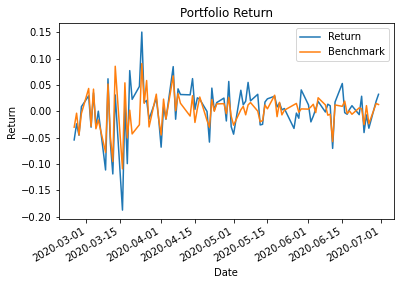

              Return  Benchmark
Date                           
2020-02-24       NaN        NaN
2020-02-25 -0.054516  -0.030302
2020-02-26 -0.023860  -0.003678
2020-02-27 -0.045549  -0.044912
2020-02-28  0.008735  -0.004201
...              ...        ...
2020-06-24 -0.040482  -0.025509
2020-06-25 -0.006939   0.010721
2020-06-26 -0.032249  -0.023752
2020-06-29  0.018912   0.014698
2020-06-30  0.032189   0.012810

[90 rows x 2 columns]


In [12]:
#Summary df to represent return chart against Benchmark
PortfolioReturn=df3[['Return']].pct_change()
PortfolioReturn['Benchmark']=BM.Benchmark

#Plot a beautiful graph
PortfolioReturn.plot(legend=True)
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Portfolio Return")
plt.show()
print(PortfolioReturn)